# Credit Card Approve

## Reference

In [112]:
# https://www.kaggle.com/datasets/youssefaboelwafa/credit-card-approval?select=cc_approvals.data

## Import Libraries

In [136]:
import numpy as numpy
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


## Import Datasets

In [114]:
# Dataset Column Overview:
# -------------------------------------------------------------------
# The features in this dataset are:


# Gender,
# Age,
# Debt,
# Married,
# BankCustomer,
# EducationLevel,
# Ethnicity,
# YearsEmployed,
# PriorDefault,
# Employed,
# CreditScore,
# DriversLicense,
# Citizen,
# ZipCode,
# Income,
# ApprovalStatus

# rename the columns of the data
a = list(range(1,16))
a = map(str,a)
a = list(a)
b = ['x' +c for c in a]

path = 'https://raw.githubusercontent.com/notfakearcher/yanjun/main/02_data/cc_approvals%5B1%5D.data'
credit_c = pd.read_csv(path, names = b, na_values = ['?'])
credit_c 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [115]:
credit_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, b to b
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      678 non-null    float64
 1   x2      690 non-null    float64
 2   x3      684 non-null    object 
 3   x4      684 non-null    object 
 4   x5      681 non-null    object 
 5   x6      681 non-null    object 
 6   x7      690 non-null    float64
 7   x8      690 non-null    object 
 8   x9      690 non-null    object 
 9   x10     690 non-null    int64  
 10  x11     690 non-null    object 
 11  x12     690 non-null    object 
 12  x13     677 non-null    float64
 13  x14     690 non-null    int64  
 14  x15     690 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 86.2+ KB


In [116]:
credit_c.isna().sum()

x1     12
x2      0
x3      6
x4      6
x5      9
x6      9
x7      0
x8      0
x9      0
x10     0
x11     0
x12     0
x13    13
x14     0
x15     0
dtype: int64

## convert string to lables and numbers in dataframe

In [117]:
# drop any rows which have null numbers 
credit_c = credit_c.dropna()

In [118]:
# convert object to int 
le = LabelEncoder()
colu_name = credit_c.select_dtypes(object).columns
credit_c[colu_name] = credit_c.select_dtypes(object).apply(le.fit_transform)
credit_c

C:\Users\julia\AppData\Local\Temp\ipykernel_1700\659324243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_c[colu_name] = credit_c.select_dtypes(object).apply(le.fit_transform)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
b,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
a,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
a,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
b,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
b,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,1
a,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,1
a,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,1
b,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,1


## split variables and target

In [119]:
target = credit_c.x15
cond = credit_c.columns == 'x15'
col_name = credit_c.columns[~cond]
X = credit_c[col_name]
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
b,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0
a,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560
a,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824
b,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3
b,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0
a,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394
a,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1
b,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750


## split data into traning data and test data

In [120]:
X_training, X_test, target_training, target_test = train_test_split(X, target, test_size = 0.3)

## Decision Tree

In [121]:
# use decison tree to fit the model 
model = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 4)
model.fit(X_training, target_training)

DecisionTreeClassifier(max_depth=4)

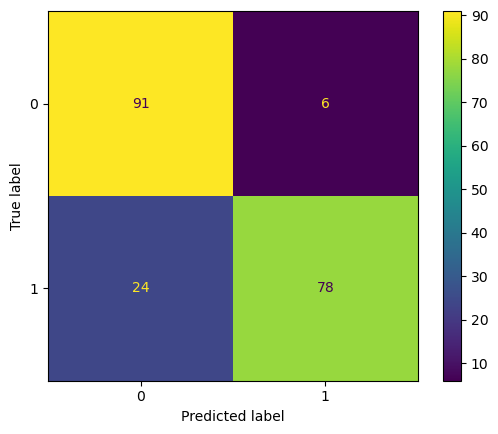

In [134]:
# use the model to predict the results 
y_pred = model.predict(X_test)
# calculate the confusion metrics
cm = confusion_matrix(target_test, y_pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()
plt.show()

In [137]:
# calculate the accuracy
cr = classification_report(target_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.79      0.94      0.86        97
           1       0.93      0.76      0.84       102

    accuracy                           0.85       199
   macro avg       0.86      0.85      0.85       199
weighted avg       0.86      0.85      0.85       199

